# Notebook of Figure 1 of manuscript titled: _Variability of the kinetic energy in seasonally ice-covered oceans_.
by Josue Martinez-Moreno, Camille Lique, Claude Talandier, Quentin
Jamet, & Anne-Marie Treguier

This figure shows the forcing and initial profiles used for the idealized simulation used in the study. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
from dask.distributed import Client
import dask
import os

client =Client(n_workers=4, threads_per_worker=1, memory_limit="2 GiB",local_directory="/home1/scratch/jmartine/tmp")
client

/home1/datawork/jmartine/conda-env/3dplot/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 47327 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:47327/status,
Dashboard: http://127.0.0.1:47327/status,Workers: 4
Total threads: 4,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52923,Workers: 4
Dashboard: http://127.0.0.1:47327/status,Total threads: 4
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:44137,Total threads: 1
Dashboard: http://127.0.0.1:35914/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:50112,


In [3]:
import cmocean as cm

# Load grid

In [4]:
grid = xr.open_dataset('/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/GRID/domain_zgr_800x1200x50xr.nc')

In [5]:
# Define dimensions
Nx, Ny, Nz = 801, 1201, 51

X = np.ones((Ny,Nx,Nz)) * grid.x_coord.values[:,:,np.newaxis]
Y = np.ones((Ny,Nx,Nz)) * grid.y_coord.values[:,:,np.newaxis]
Z = -np.ones((Ny,Nx,Nz)) * grid.gdept_1d.values[:]

## Init conditions

In [6]:
init_cond="/home1/datahome/jmartine/datawork/init/hr_canal/"

In [7]:
init_data = xr.open_dataset(init_cond+"HR_channel_oce_noise_front_75m_1_nemo4.nc")

In [8]:
init_data_temp = init_data.votemper.isel(time=0).transpose("y","x","z").isel(y=slice(1,-1),x=0)

In [9]:
from utils import Import_Expt_Front, date_fmt

In [10]:
folder = '/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/ICE-CHANEL/ice_canal_HR_output/'
EXF = Import_Expt_Front(folder)

In [11]:
exp_filter = ['expt_001','expt_002','expt_003','expt_004','expt_005','expt_006','expt_007','expt_008','expt_010','expt_250m_test']

In [12]:
dataset_gridT_1d = EXF.import_multipe_expt('grid_T',vars_of_interest=["soce"],expt_filter=exp_filter,freq='1d',chunks={'time_counter':1,'deptht':1,'x':251,'y':251})

In [13]:
init_data_salt = dataset_gridT_1d.soce_009.isel(time_counter=0).isel(y=slice(1,-1),x=0, deptht=slice(0,-1)).rename({'deptht':'z'})

# Forcing

In [14]:
forcing_cond = "/home1/datahome/jmartine/datawork/forcing/hr_canal/"

In [15]:
forcing = xr.open_dataset(forcing_cond+'HR_channel-Surf-Forcing_new_ALL_seasonal_new_grid_HR_HTR_out_boundaries_april_center_no_atm_temp_moving_test_noise.nc')

In [16]:
# Assign dates to data
date = xr.cftime_range(start="0002", periods=365, freq="1D", calendar="noleap")
forcing = forcing.assign_coords({'time':date})

In [17]:
import matplotlib.gridspec as gridspec
import datetime

In [18]:
def date_fmt(date):
    print(date)
    if len(date)>2:
        format = '%m-%d'
        outformat = '%d - %B'
    else:
        format = '%m'
        outformat = '%B'
    return datetime.datetime.strptime(str(date), format).strftime(outformat)

01
05
09
01
05


/dev/shm/pbs.3980998.datarmor0/ipykernel_16128/912385955.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(updated_labels,fontsize=10)


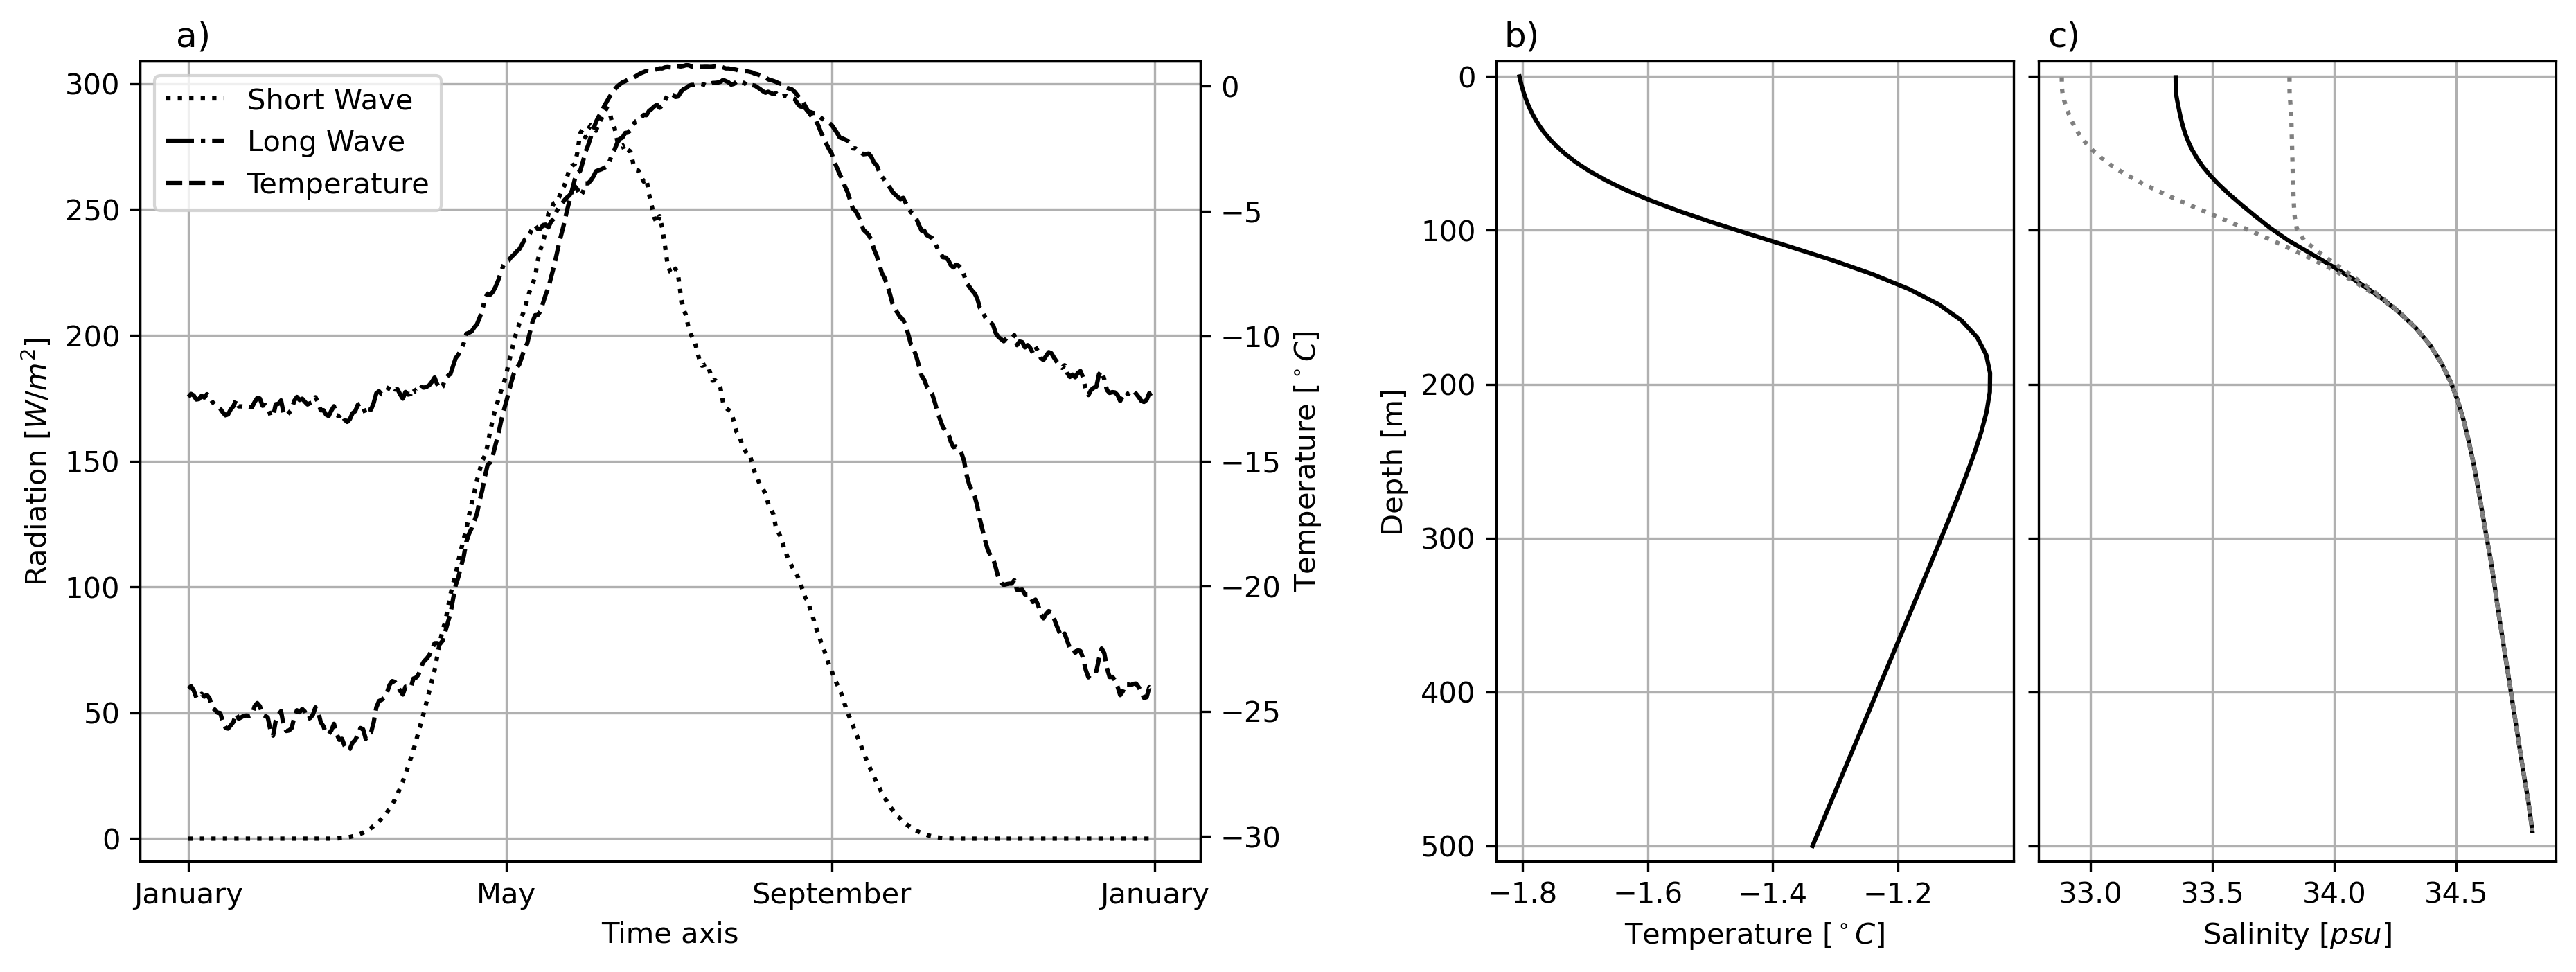

In [19]:
fig = plt.figure(figsize = (15, 5), dpi=300)

gs0 = gridspec.GridSpec(1, 9, figure=fig)

################################################################################
################################################################################
################################################################################
ax1 = fig.add_subplot(gs0[0:4])

forcing.rsw.isel(x=0,y=0).plot(ax=ax1,color='k', label='Short Wave', linestyle=':')
ax1.plot(forcing.time[0],0, color='k', label='Long Wave', linestyle='-.')
ax1.plot(forcing.time[0],0, color='k', label='Temperature', linestyle='--')
ax1.legend()
ax1.set_ylim((-9,309))

forcing.rlw.isel(x=0,y=0).plot(ax=ax1, color='k', label='Long Wave', linestyle='-.')

ax1.set_xlabel("Time axis")
ax1.set_ylabel("Radiation [$W/m^2$]")

# ax1.spines["left"].set_visible(True)
# ax1.yaxis.set_label_position('left')
# ax1.yaxis.set_ticks_position('left')

# ax_t1.spines["left"].set_position(("axes", -0.2))
# ax_t1.set_ylabel("Long wave radiation [$W/m^2$]")
# ax_t1.set_ylim((155,305))

ax_t2 = ax1.twinx()

(forcing.t10-273.15).isel(x=0,y=0).plot(ax=ax_t2, color='k', label='Temperature', linestyle='--')
ax_t2.set_ylabel("Temperature [$^\circ C$]")
ax_t2.set_ylim((-31,1))

################################################################################
################################################################################
################################################################################
axL = fig.add_subplot(gs0[5:7])

init_data_temp.mean(("y")).plot(ax=axL,y='z',label='Simulation',color='k',linestyle='-')

axL.invert_yaxis()
axL.set_ylabel("Depth [m]")
# axL.legend()

axL.set_xlabel("Temperature [$^\circ C$]")

################################################################################
################################################################################
################################################################################
axR = fig.add_subplot(gs0[7:9])

init_data_salt.mean(("y")).plot(ax=axR,y='z',color='k',linestyle='-')

init_data_salt.isel(y=slice(0,600)).mean("y").plot(ax=axR,y='z',color='gray',linestyle=':')
init_data_salt.isel(y=slice(-600,None)).mean("y").plot(ax=axR,y='z',color='gray',linestyle=':')

axR.set_xlabel("Salinity [$psu$]")
axR.yaxis.set_ticklabels([])
axR.invert_yaxis()
axR.set_ylabel('')

[a.set_ylim(510,-10)  for a in [axL, axR]]

[a.grid()  for a in [ax1, axL,axR]]
[a.set_title("")  for a in [axL,axR]]

plt.subplots_adjust(wspace=0.1)


plt.draw()

labels = [item.get_text() for item in ax1.get_xticklabels()]
updated_labels = [ date_fmt(label[5:10]) for label in labels]

ax1.set_xticklabels(updated_labels,fontsize=10)


ax1.text(0.05, 1.03, 'a)', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes,fontsize=12)
axL.text(0.05, 1.03, 'b)', horizontalalignment='center', verticalalignment='center', transform = axL.transAxes,fontsize=12)
axR.text(0.05, 1.03, 'c)', horizontalalignment='center', verticalalignment='center', transform = axR.transAxes,fontsize=12)

plt.savefig('./figures/Fig_1_forcing_and_profiles.pdf', dpi=300, bbox_inches='tight')

**Figure 1.** Forcing and vertical initial profiles of the idealized configuration. (a) Incoming short wave radiation, incoming long wave radiation, and air temperature. Vertical profiles of (b) temperature and (c) salinity for the initial conditions of the simulation. In panel c, the dotted lines correspond to the northern and southern vertical salinity profiles of the simulation. Note that the temperature profile was adjusted to match the freezing point at the surface based on the mean salinity profile.